In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float)
df['line_total'] = df['line_total'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

In [8]:
df[df.duplicated()].shape[0]

538

In [9]:
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [10]:
df.drop_duplicates()
df.dropna()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [11]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [12]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [14]:
df[df['line_total'] < 0].shape[0]

282

In [15]:
df.drop(df[df['line_total'] < 0].index, inplace = True)

In [16]:
df.describe()

,order_id,price,quantity,line_total
count,29640.000000,29640.000000,29640.000000,29640.000000
mean,14993.736471,2.511404,2.001822,5.029335
std,2888.381430,1.060330,0.819560,3.085974
min,10000.000000,0.500000,1.000000,0.000000
25%,12504.000000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17506.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


In [17]:
df[['category', 'flavour']] = df["name"].apply(lambda x: pd.Series(str(x).split("\" "))) 

In [18]:
df.head(5)

,order_id,name,ordered_at,price,quantity,line_total,category,flavour
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,"""ICE CREAM",Peanut Fudge
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,"""ICE CREAM",Peanut Fudge
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,"""SORBET",Raspberry
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5,nan,NaN
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,"""CONE",Dipped Waffle Cone


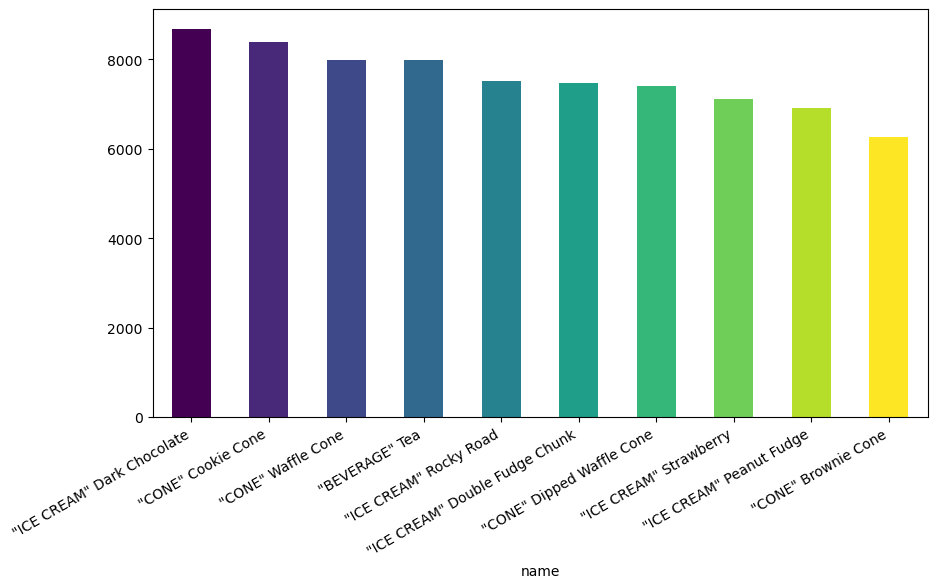

In [19]:
import numpy as np
f, ax = plt.subplots(figsize=(10, 6))

num_colors = 10
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(num_colors).plot(kind='bar', 
                                                                                           color=colors)
f.autofmt_xdate()

plt.show()
